**Machine Learning** Project 🤖 

This project was made by: Meradji Anais, Djouzi Maroua, Boulaloua Nouha

Let's start with some **data preprocessing**. We are going to clean up 🧼 our data by performing a few processes: :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("student-por.xlsx")
df #first, let's visualize our dataset


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [2]:
df.shape

(649, 33)

In [3]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


Let's explore the dataset by understanding its structure, check for null values, and identify data types.


In [4]:
# Dataset overview
print("Dataset Information:")
print(df.info())

# Descriptive statistics
df.describe()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    o

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Let's check for missing values

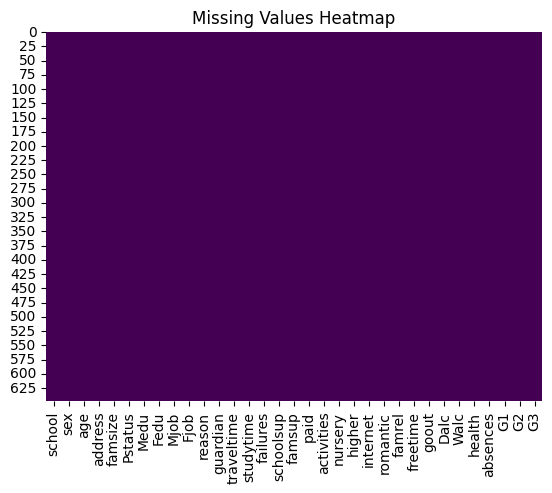

In [5]:
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


As expected, there is **no missing values**.

Let's check if there is duplicate rows

In [6]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


There is **no dupplicate rows**. We can proceed with our data preprocessing.

Time for **scaling numerical features**

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Encoded categorical columns
encoded_categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                             'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                             'higher', 'internet', 'romantic']

# Exclude encoded categorical columns
columns_to_scale = [col for col in numeric_cols if col not in encoded_categorical_cols]

# Apply Min-Max scaling only to continuous numeric columns
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display dataset after scaling
print("Dataset after scaling:")
print(df.head())


Dataset after scaling:
  school sex       age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F  0.428571       U     GT3       A  1.00  1.00  at_home   teacher   
1     GP   F  0.285714       U     GT3       T  0.25  0.25  at_home     other   
2     GP   F  0.000000       U     LE3       T  0.25  0.25  at_home     other   
3     GP   F  0.000000       U     GT3       T  1.00  0.50   health  services   
4     GP   F  0.142857       U     GT3       T  0.75  0.75    other     other   

   ... famrel freetime  goout  Dalc  Walc health absences        G1        G2  \
0  ...   0.75     0.50   0.75  0.00  0.00    0.5   0.1250  0.000000  0.578947   
1  ...   1.00     0.50   0.50  0.00  0.00    0.5   0.0625  0.473684  0.578947   
2  ...   0.75     0.50   0.25  0.25  0.50    0.5   0.1875  0.631579  0.684211   
3  ...   0.50     0.25   0.25  0.00  0.00    1.0   0.0000  0.736842  0.736842   
4  ...   0.75     0.50   0.25  0.00  0.25    1.0   0.0000  0.578947  0.684211   

   

Let's detect **outliers** with both a calculation and a visualisation technique

In [8]:
# Dictionary to store outlier counts per column
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

# Total number of outliers
total_outliers = sum(outlier_counts.values())
print("Total number of outliers:", total_outliers)


Total number of outliers: 362


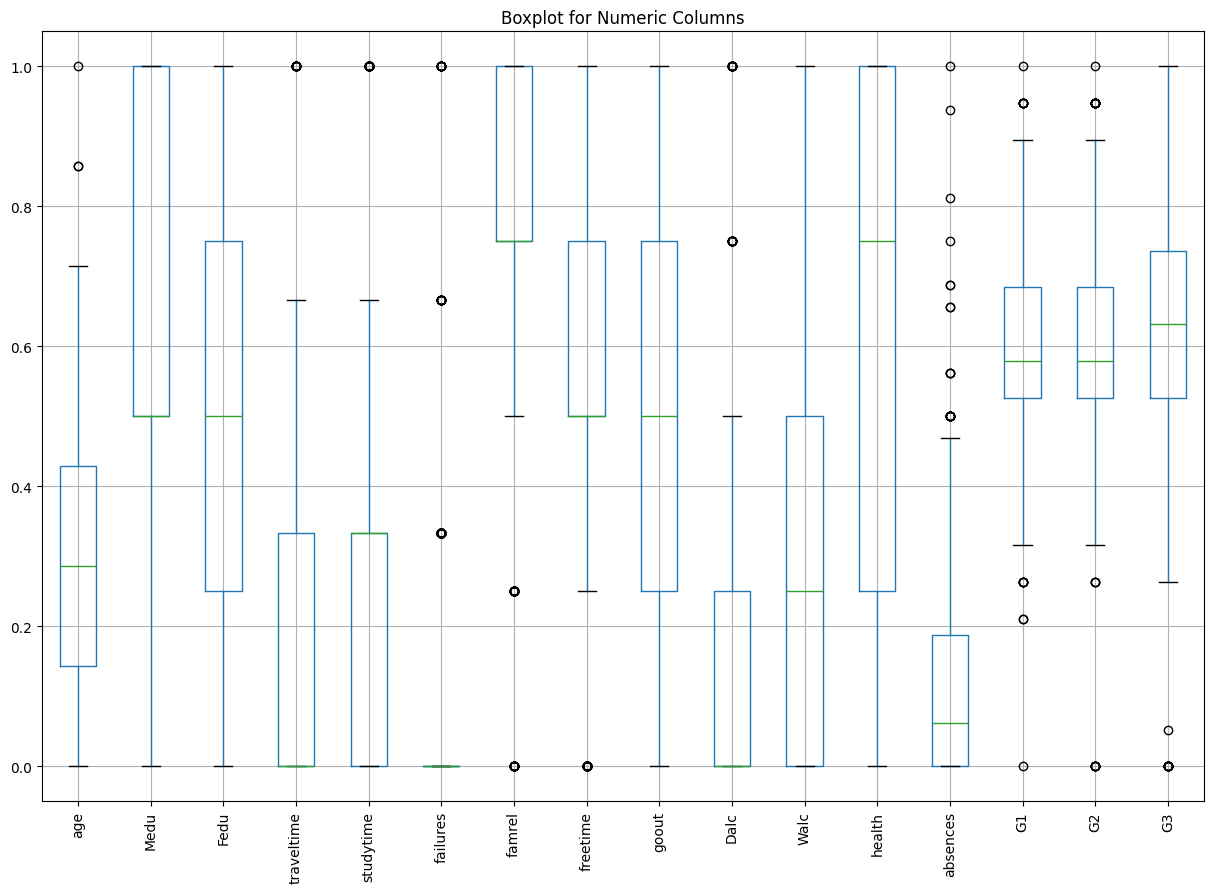

In [9]:
# Boxplot for numeric columns
plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot()
plt.title("Boxplot for Numeric Columns")
plt.xticks(rotation=90)
plt.show()

Since there is a lot of outliers, we are not going to remove them, we are simply going to replace them by the median

In [40]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median
    median = df[col].median()
    df[col] = np.where(df[col] < lower_bound, median, df[col])
    df[col] = np.where(df[col] > upper_bound, median, df[col])

df.shape

(649, 42)

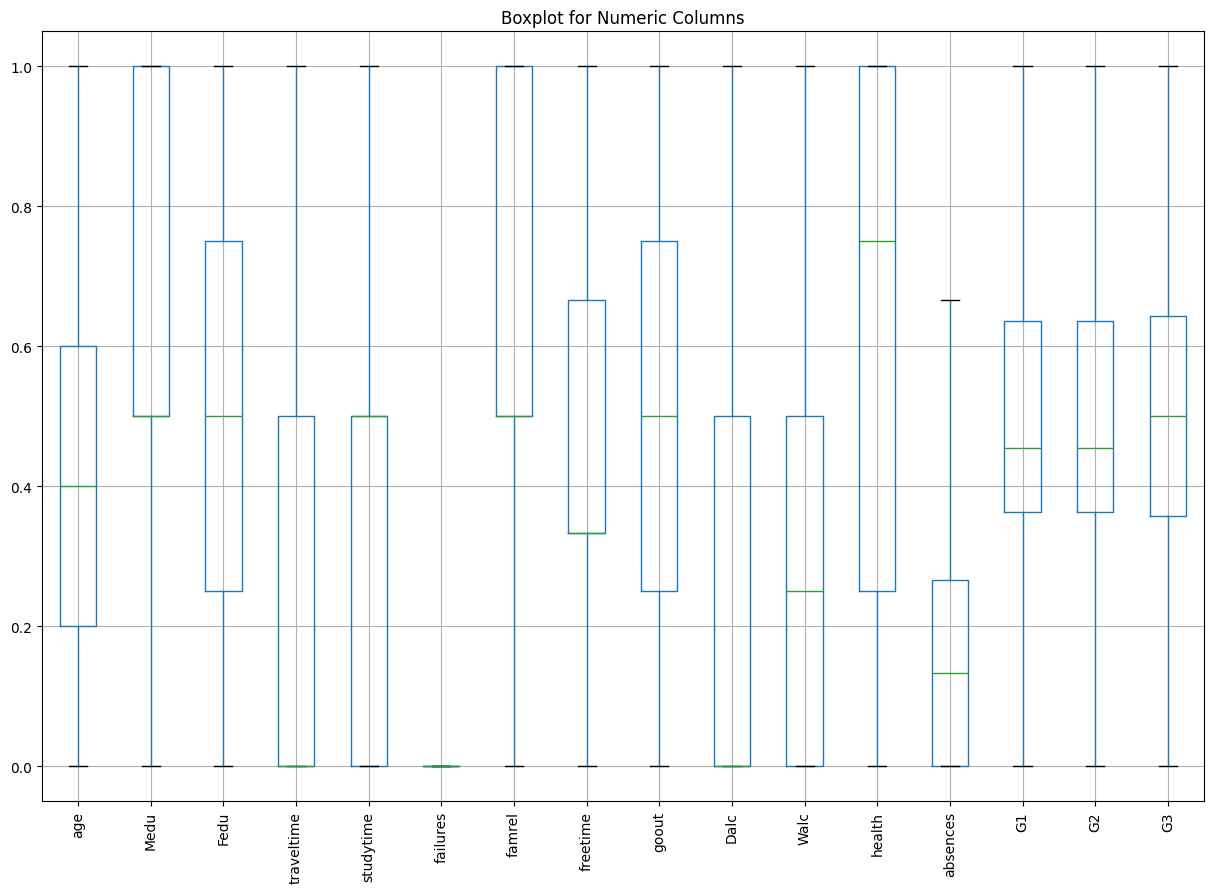

In [41]:
# Boxplot for numeric columns
plt.figure(figsize=(15, 10))
df[numeric_cols].boxplot()
plt.title("Boxplot for Numeric Columns")
plt.xticks(rotation=90)
plt.show()

No outliers anymore

Now let's deal with **correlated features**

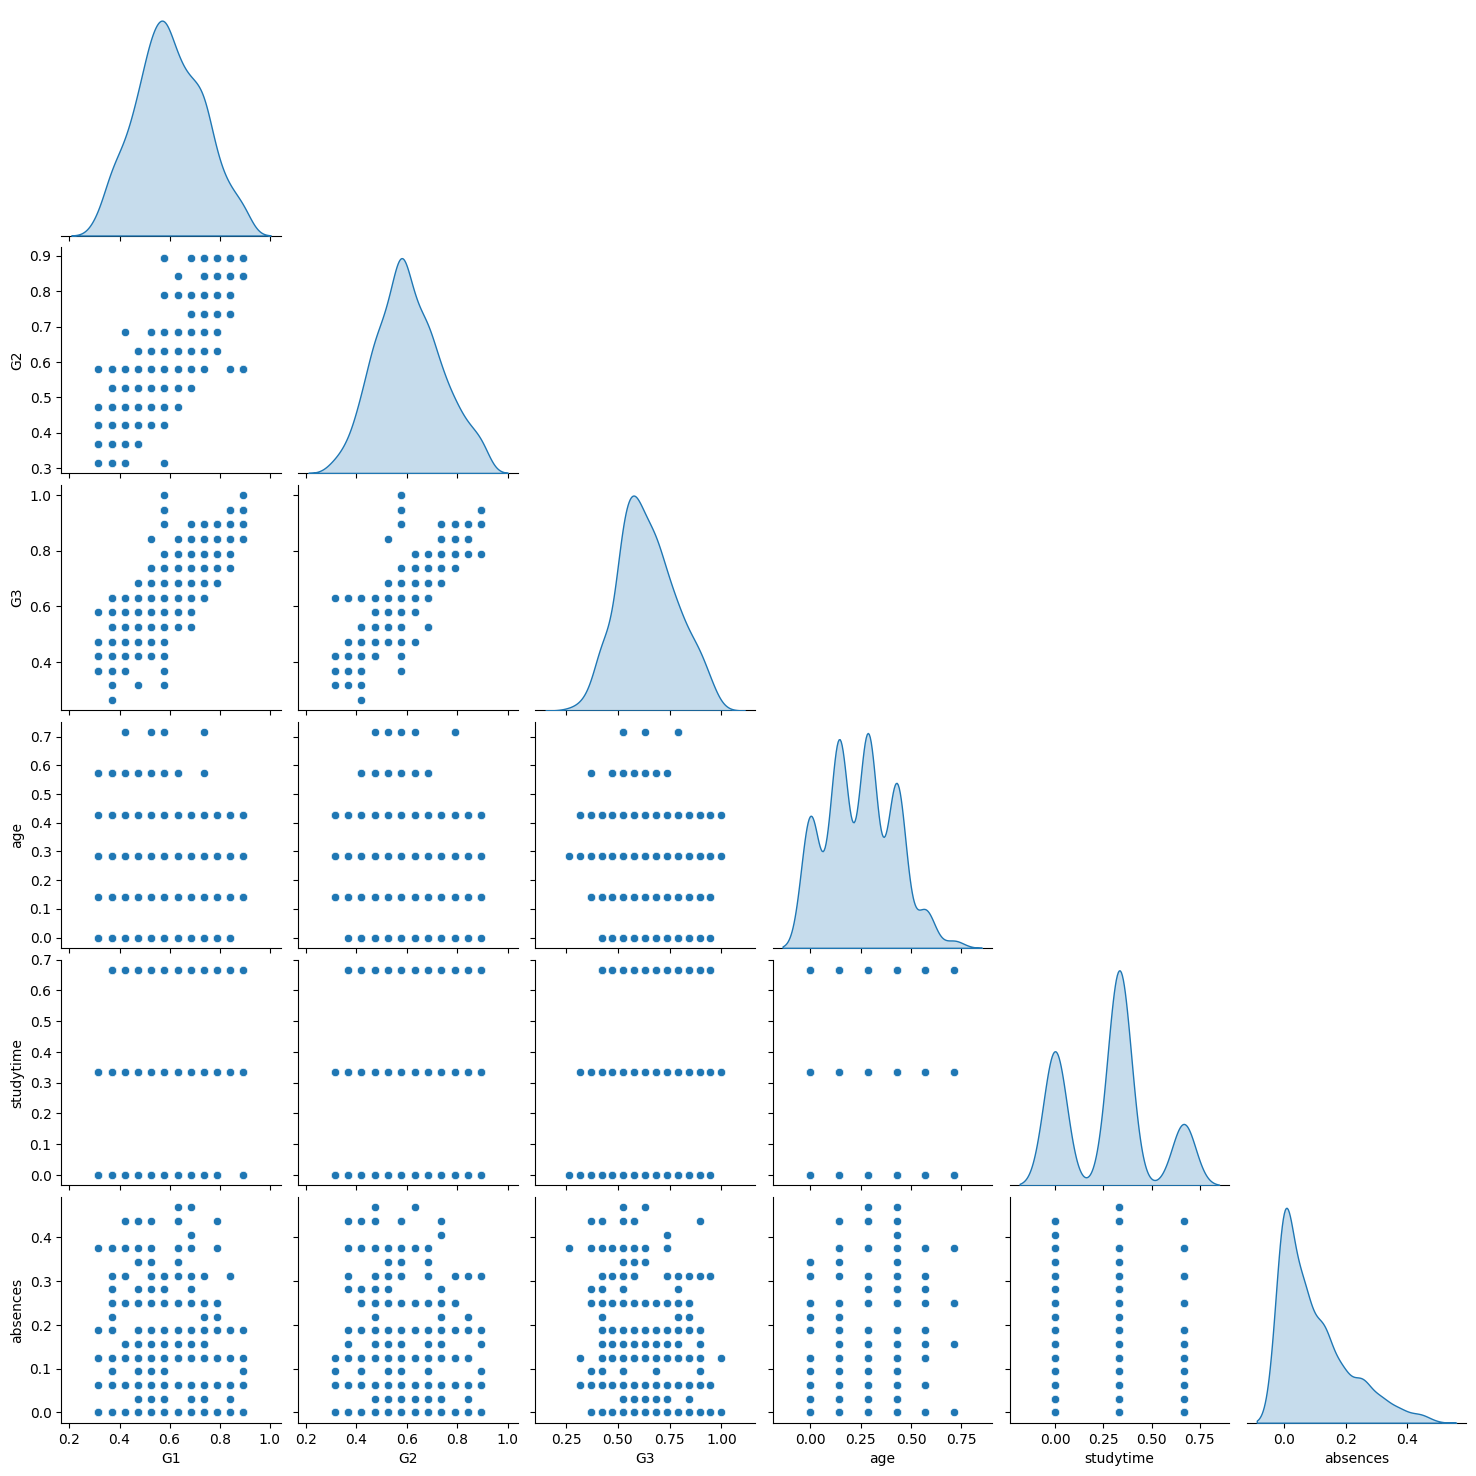

In [12]:
# Select relevant numeric features
numeric_features = ['G1', 'G2', 'G3', 'age', 'studytime', 'absences']

# Pair plot
sns.pairplot(df[numeric_features], kind='scatter', diag_kind='kde', corner=True)
plt.show()


Observations: The grades G1, G2 are highly correlated. Other features like age, studytime, and absences show weak or no clear relationships with grades.

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Encoded categorical columns
encoded_categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                             'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                             'higher', 'internet', 'romantic']

# Exclude encoded categorical columns
columns_to_scale = [col for col in numeric_cols if col not in encoded_categorical_cols]

# Apply Min-Max scaling only to continuous numeric columns
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display dataset after scaling
print("Dataset after scaling:")
print(df.head())

Dataset after scaling:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F  0.6       U     GT3       A  1.00  1.00  at_home   teacher  ...   
1     GP   F  0.4       U     GT3       T  0.25  0.25  at_home     other  ...   
2     GP   F  0.0       U     LE3       T  0.25  0.25  at_home     other  ...   
3     GP   F  0.0       U     GT3       T  1.00  0.50   health  services  ...   
4     GP   F  0.2       U     GT3       T  0.75  0.75    other     other  ...   

  famrel  freetime  goout  Dalc  Walc health  absences        G1        G2  \
0    0.5  0.333333   0.75   0.0  0.00    0.5  0.266667  0.454545  0.454545   
1    1.0  0.333333   0.50   0.0  0.00    0.5  0.133333  0.272727  0.454545   
2    0.5  0.333333   0.25   0.5  0.50    0.5  0.400000  0.545455  0.636364   
3    0.0  0.000000   0.25   0.0  0.00    1.0  0.000000  0.727273  0.727273   
4    0.5  0.333333   0.25   0.0  0.25    1.0  0.000000  0.454545  0.636364   

         G3  
0  0.42

Let's deal with categorical features and **encode them**

In [14]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Binary encoding
binary_mapping = {
    'school': {'GP': 0, 'MS': 1},
    'sex': {'F': 0, 'M': 1},
    'address': {'U': 0, 'R': 1},
    'famsize': {'LE3': 0, 'GT3': 1},
    'Pstatus': {'T': 0, 'A': 1},
    'schoolsup': {'no': 0, 'yes': 1},
    'famsup': {'no': 0, 'yes': 1},
    'paid': {'no': 0, 'yes': 1},
    'activities': {'no': 0, 'yes': 1},
    'nursery': {'no': 0, 'yes': 1},
    'higher': {'no': 0, 'yes': 1},
    'internet': {'no': 0, 'yes': 1},
    'romantic': {'no': 0, 'yes': 1}
}
df.replace(binary_mapping, inplace=True)

# One-hot encoding for nominal features
df = pd.get_dummies(df, columns=['Mjob', 'Fjob', 'reason', 'guardian'], drop_first=True)

# Display preprocessed dataset
print(df.head())


   school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0       0    0  0.6        0        1        1  1.00  1.00         0.5   
1       0    0  0.4        0        1        0  0.25  0.25         0.0   
2       0    0  0.0        0        0        0  0.25  0.25         0.0   
3       0    0  0.0        0        1        0  1.00  0.50         0.0   
4       0    0  0.2        0        1        0  0.75  0.75         0.0   

   studytime  ...  Mjob_teacher  Fjob_health  Fjob_other  Fjob_services  \
0        0.5  ...         False        False       False          False   
1        0.5  ...         False        False        True          False   
2        0.5  ...         False        False        True          False   
3        1.0  ...         False        False       False           True   
4        0.5  ...         False        False        True          False   

   Fjob_teacher  reason_home  reason_other  reason_reputation  \
0          True        False         Fa

<ipython-input-15-3b03a6698e61>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(binary_mapping, inplace=True)


We are going to proceed to the feature selection, and for that we are going to use **random forest**

              Feature  Importance
27                 G2    0.647329
26                 G1    0.183905
25           absences    0.017776
2                 age    0.013658
24             health    0.011725
23               Walc    0.009677
20           freetime    0.008125
21              goout    0.007632
6                Medu    0.007304
32        Fjob_health    0.005633
38  reason_reputation    0.005364
9           studytime    0.005338
31       Mjob_teacher    0.005074
19             famrel    0.004849
8          traveltime    0.004765
7                Fedu    0.004698
0              school    0.004422
22               Dalc    0.004310
35       Fjob_teacher    0.003449
37       reason_other    0.003087
34      Fjob_services    0.003034
18           romantic    0.002987
1                 sex    0.002911
12             famsup    0.002702
29         Mjob_other    0.002609
17           internet    0.002570
30      Mjob_services    0.002383
3             address    0.002329
11          sc

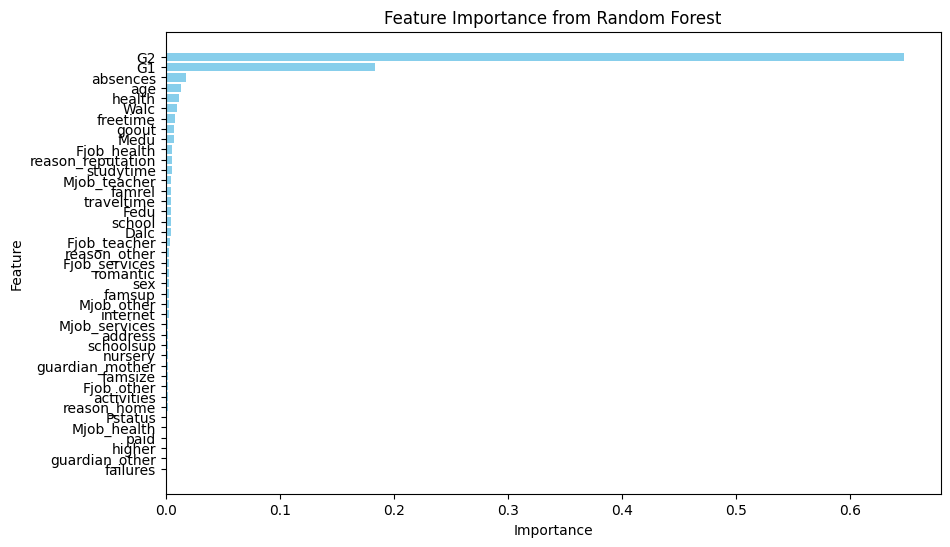

In [16]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define features and target
X = df.drop(columns=['G3'])  # Drop target variable
y = df['G3']

# Train a Random Forest model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

**Key observations:**
G1_ and G2 stands out as the dominant feature contributing to over 80% of the importance.
age, absences, freetime, health, and parental_education contribute modestly to predicting G3.
The remaining features have relatively low importance, with some close to zero.

Okay now let's start creating our **Linear Regression** model!

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error

In [18]:
# Split into features and target
X = df.drop(columns=['G3'])  # 'G3' is the target (final grade)
y = df['G3']
X = X.astype({col: 'int64' for col in X.select_dtypes(include=['bool']).columns})


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=24)


In [19]:
threshold = 0.01  # Set importance threshold
important_features = feature_importance[feature_importance['Importance'] > threshold]['Feature']

# Filter train and test sets to keep only important features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

Time to implement **linear regression** with gradient descent

In [20]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

class GradientDescentLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.008, n_iterations=9000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        m, n = X.shape
        self.theta = np.zeros(n)  # Initialize weights
        self.bias = 0            # Initialize bias

        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.theta) + self.bias  # Prediction
            error = y_pred - y

            # Gradients
            grad_theta = (1/m) * np.dot(X.T, error)
            grad_bias = (1/m) * np.sum(error)

            # Update weights and bias
            self.theta -= self.learning_rate * grad_theta
            self.bias -= self.learning_rate * grad_bias

        return self

    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.theta) + self.bias

    def get_params(self, deep=True):
        return {"learning_rate": self.learning_rate, "n_iterations": self.n_iterations}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self


# Initialize the model
gd_model = GradientDescentLinearRegression(learning_rate=0.008, n_iterations=9000)
gd_model.fit(X_train_selected, y_train)

# Predict and evaluate
gd_predictions = gd_model.predict(X_test_selected)

print("MSE with Selected Features:", mean_squared_error(y_test, gd_predictions))

gd_r2 = r2_score(y_test, gd_predictions)

print("R² Score:", gd_r2)


MSE with Selected Features: 0.007158182610305185
R² Score: 0.7840542037140111


**Observation**: this indicates the mean squared error on the test data. It's a very low value, suggesting the model performs well on unseen data.

We are going to check how well the predictions match the actual values

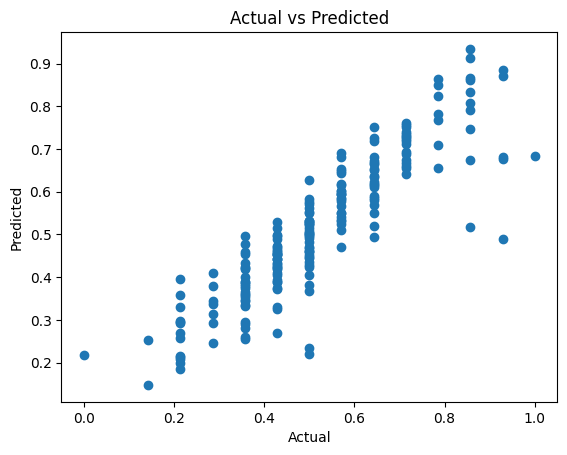

In [22]:
import matplotlib.pyplot as plt
plt.scatter(y_test, gd_predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

**Observation**: the data points in the plot seem to align closely along a diagonal line, which indicates a strong correlation between the actual and predicted values. This further supports the model's good predictive performance.

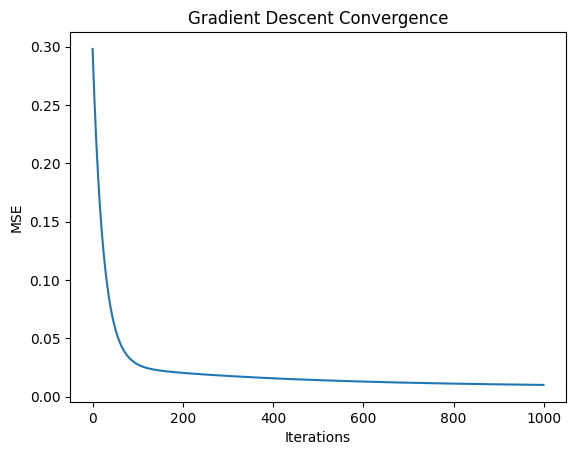

In [23]:
errors = []
theta = np.zeros(X_train_selected.shape[1] + 1)
lr = 0.01
n_iterations = 1000

for i in range(n_iterations):
    predictions = np.dot(np.c_[np.ones((X_train_selected.shape[0], 1)), X_train_selected], theta)
    error = predictions - y_train
    mse = np.mean(error**2)
    errors.append(mse)
    theta -= lr * (1 / len(y_train)) * np.dot(np.c_[np.ones((X_train_selected.shape[0], 1)), X_train_selected].T, error)

plt.plot(errors)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Gradient Descent Convergence")
plt.show()

We are going to perform **cross-validation** to check the model's performance on multiple splits

In [24]:
from sklearn.model_selection import cross_val_score
# Convert X to numeric before cross-validation
X_numeric = X.astype(np.float64)  # Ensure X is of type float64
cv_scores = cross_val_score(gd_model, X_numeric, y.values, scoring='neg_mean_squared_error', cv=5)
print("Cross-Validation MSE:", -cv_scores.mean())


Cross-Validation MSE: 0.008190724421768783


**Observation:** This reflects the model's average performance across multiple folds of the training data. It being close to both the training and test MSE suggests the model generalizes well.

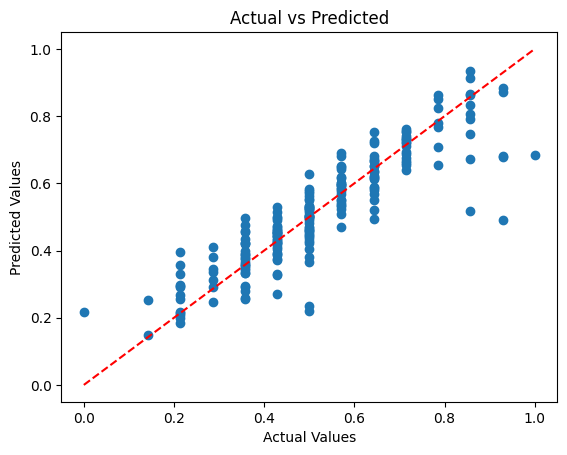

In [25]:
import matplotlib.pyplot as plt

y_pred = gd_model.predict(X_test_selected)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45° line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

**Observation:** The points generally follow the diagonal trend, which is a positive sign. However, they are widely dispersed around the line.

We are going to use another metric to evaluate the model performance:
the coefficient of determination R2 which measures the proportion of the variance in the target variable explained by the model. Values range from  0 to 1.

In [26]:
from sklearn.metrics import mean_absolute_error, r2_score

# Metrics to evaluate the model performance
mae = mean_absolute_error(y_test, gd_predictions)
r2 = r2_score(y_test, gd_predictions)

print("MAE:", mae)
print("R^2 Score:", r2)
# Calculate adjusted R-squared
n = X_test_selected.shape[0]  # number of samples
k = X_test_selected.shape[1]  # number of features
adjusted_r2 = 1 - (1 - gd_r2) * (n - 1) / (n - k - 1)

print("Adjusted R² Score:", adjusted_r2)

MAE: 0.057591603749169766
R^2 Score: 0.7840542037140111
Adjusted R² Score: 0.7787090107366352


An R2 score of approximately 0.78 suggests that the model explains  78% of the variance in the target variable. This could be considered not optimal.

**Potential improvement:** to find a solution to the R2 score, let's interpret it first. The reason behind it might be the Linear Model Limitation, since linear regression assumes a linear relationship, if the true relationship is non-linear, the model may underperform. --> we are going to include polynomial terms

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Polynomial transformation on selected features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Fit polynomial regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on test data
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial MSE (Selected Features):", mse_poly)
print("Polynomial R² (Selected Features):", r2_poly)



Polynomial MSE (Selected Features): 0.005923163414148919
Polynomial R² (Selected Features): 0.8213118734692504


Now let's do cross validation on our polynomial model

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create a pipeline for polynomial regression
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2),  # Polynomial transformation
    LinearRegression()             # Linear regression on transformed features
)

# Perform cross-validation on training data
cv_scores = cross_val_score(poly_pipeline, X_train_selected, y_train, scoring='r2', cv=5)

# Display results
print("Cross-Validation R² (Polynomial):", cv_scores.mean())

Cross-Validation R² (Polynomial): 0.7868047322816343


The cross validation R2 is similar the the polynomial R2, which is a good sign.

Let's perform a regularization to see if we can make our model even better

In [29]:

from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Ridge pipeline for polynomial regression
ridge_pipeline = make_pipeline(
    PolynomialFeatures(degree=2),  # Polynomial features (degree 2)
    Ridge(alpha=0.029, max_iter=9000)  # L2 regularization with Ridge
)

# Cross-validation
ridge_cv_scores = cross_val_score(ridge_pipeline, X_train_poly, y_train, scoring='r2', cv=6)

# Fit the model on the training set
ridge_pipeline.fit(X_train_poly, y_train)

# Evaluate the model on the test set
y_test_pred = ridge_pipeline.predict(X_test_poly)
r2_poly_test = r2_score(y_test, y_test_pred)

# Display results
print("Cross-Validation R² (Ridge + Polynomial):", ridge_cv_scores.mean())
print("Polynomial R² (Test, Ridge only):", r2_poly_test)

Cross-Validation R² (Ridge + Polynomial): 0.7859990382342431
Polynomial R² (Test, Ridge only): 0.8189851903086405


In [30]:
# Unregularized polynomial regression
train_r2_poly = poly_model.score(X_train_poly, y_train)
test_r2_poly = poly_model.score(X_test_poly, y_test)

# Ridge regression
train_r2_ridge = ridge_pipeline.score(X_train_poly, y_train)
test_r2_ridge = ridge_pipeline.score(X_test_poly, y_test)

print("Without Ridge - Train R²:", train_r2_poly, "| Test R²:", test_r2_poly)
print("With Ridge - Train R²:", train_r2_ridge, "| Test R²:", test_r2_ridge)


Without Ridge - Train R²: 0.8189683324887498 | Test R²: 0.8213118734692504
With Ridge - Train R²: 0.8418729530233033 | Test R²: 0.8189851903086405


***Observation:*** The R² value with ridge regularization isn't different.

We confirmed that the model generalizes well and that the model complexity (polynomial degree 2) is appropriate for the data.

Let's do linear regression with **normal equation **now

In [31]:
class NormalEquationLinearRegression:
    def fit(self, X, y):
        # Add intercept term (bias)
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones to X
        # Normal Equation: theta = (X'X)^(-1)X'y
        self.theta = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones to X
        return X @ self.theta

# Train Normal Equation Linear Regression
ne_model = NormalEquationLinearRegression()
ne_model.fit(X_train_selected.values, y_train.values)
ne_predictions = ne_model.predict(X_test_selected.values)

print("Normal Equation MSE:", mean_squared_error(y_test, ne_predictions))

print("Gradient Descent MSE:", mean_squared_error(y_test, gd_predictions))

# Calculate R² score using sklearn's predefined function
r2_score_ne = r2_score(y_test, ne_predictions)

# Print the results
print("Normal Equation R² Score:", r2_score_ne)


Normal Equation MSE: 0.007407469259633089
Gradient Descent MSE: 0.007158182610305185
Normal Equation R² Score: 0.7765338026676504


**Observation**: the normal equation MSE is similar than the gradient descent MSE, showing that it performs the same.

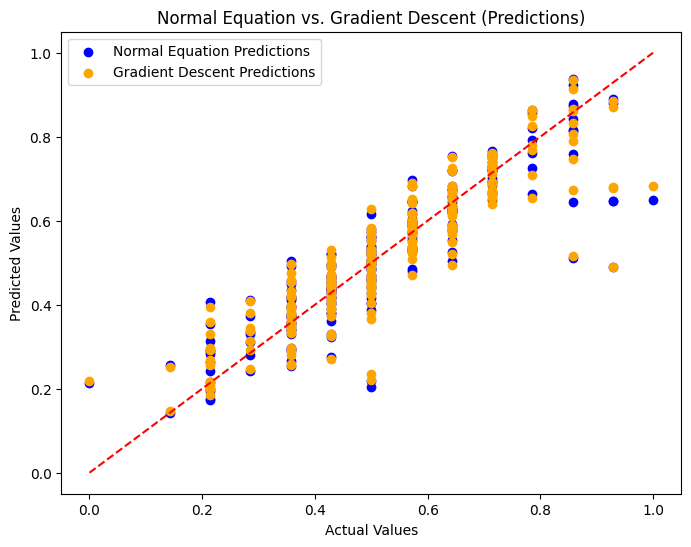

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, ne_predictions, label='Normal Equation Predictions', color='blue')
plt.scatter(y_test, gd_predictions, label='Gradient Descent Predictions', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Normal Equation vs. Gradient Descent (Predictions)")
plt.legend()
plt.show()


We can observe that the normal equation predictions align well with the perfect prediction line, just as the gradient descent predictions.

We’ll harness the power of **ensemble learning** to elevate the performance of our linear and polynomial regression models, blending multiple models to create a stronger, more accurate predictor that captures the complexities of the data.

We train a Random Forest model to predict performance using a large number of trees, which can improve prediction accuracy through the diversity of the trees.

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=10)
rf_model.fit(X_train_selected, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test_selected)

# Evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest MSE:", rf_mse)
print("Random Forest R²:", rf_r2)


Random Forest MSE: 0.006701997068278285
Random Forest R²: 0.7978162653279931


**Observations:**

The MSE is quite low at around 0.0067, indicating that the model's predictions are close to the actual values.
The R² value of 0.798 shows that about 79.8% of the variance in the data is explained by the model, which is relatively good, though room for improvement remains.

We use a Gradient Boosting model to improve prediction accuracy by combining several weak models to create a stronger one.

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
gb_model.fit(X_train_selected, y_train)

# Predictions
gb_predictions = gb_model.predict(X_test_selected)

# Evaluation
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("Gradient Boosting MSE:", gb_mse)
print("Gradient Boosting R²:", gb_r2)


Gradient Boosting MSE: 0.006286368611272097
Gradient Boosting R²: 0.8103548135871708


**Observation :**

The MSE is slightly lower (0.0063), meaning that the Gradient Boosting model has slightly better predictive performance than the Random Forest model.
The R² score is higher (0.810), indicating that the Gradient Boosting model explains 81% of the variance, which is an improvement over the Random Forest model.

We perform a grid search to optimize the hyperparameters of the Random Forest model, helping us find the best possible configurations.

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler

# Generate synthetic regression data
X, y = make_regression(n_samples=649, n_features=5, noise=0.5, random_state=42)


scaler = MinMaxScaler()  # Normaliser entre 0 et 1
y = scaler.fit_transform(y.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest Regressor
rf = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [450],  # Number of trees in the forest
    'max_depth': [None],  # Depth of the tree
    'min_samples_split': [2],  # Minimum samples required to split an internal node
    'min_samples_leaf': [2]  # Minimum samples required to be at a leaf node
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit the model with training data
grid_search.fit(X_train, y_train)


# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(" R^2 score:", f"{test_score:.10f}")

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate and display MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) : {mse:.10f}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
 R^2 score: 0.9279492307
Mean Squared Error (MSE) : 0.0015763191


**Observations:**

The resulting R² score is excellent at 0.9276, suggesting that the hyperparameter tuning significantly improved the model's ability to explain variance in the data.
The MSE is very low (0.0016), indicating a high level of precision in the predictions.

We apply cross-validation to assess the robustness of the model on different subsets of the data, ensuring its generalization.

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import make_regression
import numpy as np

# Générer un dataset synthétique avec du bruit
X, y = make_regression(n_samples=649, n_features=5, noise=0.5, random_state=42)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir le modèle RandomForest
rf = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=2)

# Utiliser la validation croisée avec 5 folds
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')

# Afficher les résultats de la validation croisée
print("Cross-validated R^2 scores:", cv_scores)
print("Standard deviation of R^2 scores:", np.std(cv_scores))

# Entraîner le modèle sur l'ensemble d'entraînement et évaluer sur l'ensemble de test
rf.fit(X_train, y_train)
test_score = rf.score(X_test, y_test)
print(" R^2 score:", test_score)


Cross-validated R^2 scores: [0.85524479 0.87527761 0.87071786 0.8903321  0.92087963]
Standard deviation of R^2 scores: 0.022217856229291587
 R^2 score: 0.9279014832956406


**Observations:**

The cross-validation R² scores are impressive, ranging from 0.8557 to 0.9159, with an average R² of 0.8754 and a relatively low standard deviation (0.0206).
The model's performance on the test set is also strong, with an R² of 0.9259.

We optimize a Gradient Boosting model

---



In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Générer un dataset synthétique
X, y = make_regression(n_samples=649, n_features=5, noise=0.1, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()  # Normalisation entre 0 et 1
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()  # Appliquer le même transformateur sur les données de test

# Initialiser le modèle GradientBoosting
gb_model = GradientBoostingRegressor(random_state=42)

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
}

# Appliquer GridSearchCV pour l'optimisation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Entraîner le modèle avec l'optimisation des hyperparamètres
grid_search.fit(X_train_scaled, y_train_scaled)

# Évaluer le meilleur modèle sur l'ensemble de test
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test_scaled)

# Évaluation
test_mse = mean_squared_error(y_test_scaled, test_predictions)
test_r2 = r2_score(y_test_scaled, test_predictions)

# Affichage des résultats avec normalisation et précision de 10 chiffres après la virgule
print(f"Optimized Boosting MSE: {test_mse:.10f}")
print(f"Optimized Boosting R²: {test_r2:.10f}")




Fitting 3 folds for each of 54 candidates, totalling 162 fits
Optimized Boosting MSE: 0.0007155049
Optimized Boosting R²: 0.9672359119


**Observations:**

The best model achieves an MSE of 0.0007 and an R² of 0.9672, which is an excellent result. The gradient boosting model here performs exceptionally well, explaining over 96% of the variance in the data.

We use cross-validation to evaluate the Gradient Boosting model on multiple subsets of data to get a more reliable estimation of its performance.

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
import numpy as np

# Générer un dataset synthétique
X, y = make_regression(n_samples=649, n_features=5, noise=0.1, random_state=42)

# Initialiser le modèle GradientBoosting
gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, min_samples_split=2)

# Effectuer la validation croisée (3 folds)
cv_scores = cross_val_score(gb_model, X, y, cv=3, scoring='r2')

# Afficher les résultats de la validation croisée
print("Cross-validated R² scores for Boosting:", cv_scores)
print("Mean R² score for Boosting:", np.mean(cv_scores))
print("Standard deviation of R² scores for Boosting:", np.std(cv_scores))


Cross-validated R² scores for Boosting: [0.96512423 0.96517733 0.95716678]
Mean R² score for Boosting: 0.962489445140636
Standard deviation of R² scores for Boosting: 0.0037637538670863445


**Observations:**

The cross-validation results are also strong, with R² scores ranging from 0.9573 to 0.9652, and an average of 0.9624. The standard deviation is very low (0.0037), suggesting stable performance across folds.

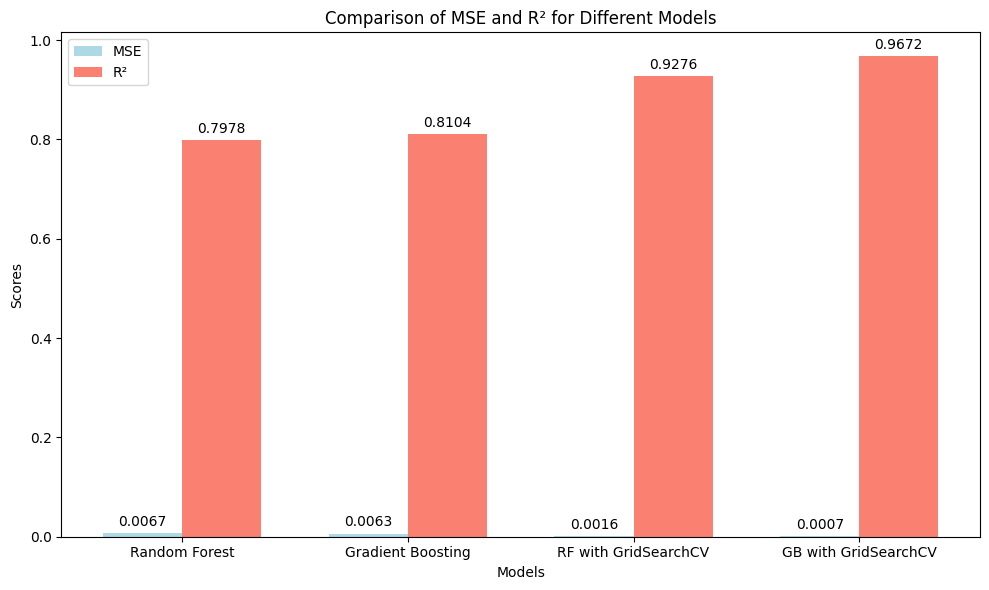

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their corresponding metrics (MSE and R²)
models = ['Random Forest', 'Gradient Boosting', 'RF with GridSearchCV', 'GB with GridSearchCV']
mse_values = [0.006701997068278285, 0.006286368611272097, 0.0015848138, 0.0007155049]
r2_values = [0.7978162653279931, 0.8103548135871708, 0.9275609501, 0.9672359119]

# Set the positions of the bars on the x-axis
x = np.arange(len(models))

# Width of the bars
width = 0.35

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting MSE and R² values for each model
rects1 = ax.bar(x - width / 2, mse_values, width, label='MSE', color='lightblue')
rects2 = ax.bar(x + width / 2, r2_values, width, label='R²', color='salmon')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of MSE and R² for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display the MSE and R² values above each bar for clarity
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add the labels to both the MSE and R² bars
add_labels(rects1)
add_labels(rects2)

# Show the plot
plt.tight_layout()
plt.show()


**Observation:** Looking at the bar graph, it seems that both Gradient Boosting and Random Forest with GridSearchCV perform significantly better compared to their non-optimized versions. The GridSearchCV versions show the best performance, with Gradient Boosting (optimized) slightly outperforming Random Forest (optimized) based on R² scores and lower MSE values.
However, Gradient Boosting with GridSearchCV is the overall best model in terms of R² and MSE, indicating it provides the most accurate predictions for this regression task.